In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pickle import dump

In [34]:
data = pd.read_csv("./data/ATP.csv")
data

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,...,20.180000,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,...,28.780000,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   best_of             169690 non-null  int64  
 1   draw_size           1232 non-null    float64
 2   l_1stIn             83415 non-null   float64
 3   l_1stWon            83415 non-null   float64
 4   l_2ndWon            83415 non-null   float64
 5   l_SvGms             83415 non-null   float64
 6   l_ace               83415 non-null   float64
 7   l_bpFaced           83415 non-null   float64
 8   l_bpSaved           83415 non-null   float64
 9   l_df                83415 non-null   float64
 10  l_svpt              83415 non-null   float64
 11  loser_age           164700 non-null  float64
 12  loser_entry         25339 non-null   object 
 13  loser_hand          169605 non-null  object 
 14  loser_ht            139052 non-null  float64
 15  loser_id            169690 non-nul

In [36]:
data_filtered = data.drop(columns=["best_of", "draw_size","loser_name","winner_name","loser_entry","winner_entry","loser_seed","winner_seed", "match_num", "minutes", "round", "score", "surface", "tourney_date","tourney_name", "tourney_id", "tourney_level"]).dropna()
data_filtered.head()

,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,...,w_bpSaved,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_rank,winner_rank_points
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,5.0,0.0,53.0,25.61,R,180.0,101142,ESP,9.0,1487.0
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,1.0,56.0,21.55,R,180.0,101613,USA,94.0,371.0
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,2.0,4.0,80.0,25.32,R,185.0,101179,FRA,77.0,468.0
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,6.0,1.0,82.0,25.83,R,180.0,101117,GER,65.0,502.0
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,2.0,4.0,65.0,19.71,R,185.0,101901,USA,190.0,142.0


In [37]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   l_1stIn             75881 non-null  float64
 1   l_1stWon            75881 non-null  float64
 2   l_2ndWon            75881 non-null  float64
 3   l_SvGms             75881 non-null  float64
 4   l_ace               75881 non-null  float64
 5   l_bpFaced           75881 non-null  float64
 6   l_bpSaved           75881 non-null  float64
 7   l_df                75881 non-null  float64
 8   l_svpt              75881 non-null  float64
 9   loser_age           75881 non-null  float64
 10  loser_hand          75881 non-null  object 
 11  loser_ht            75881 non-null  float64
 12  loser_id            75881 non-null  int64  
 13  loser_ioc           75881 non-null  object 
 14  loser_rank          75881 non-null  float64
 15  loser_rank_points   75881 non-null  float64
 16 

In [38]:
dict_hand = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_hand"],data_filtered["winner_hand"]],axis=0)))}
dict_ioc = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_ioc"],data_filtered["winner_ioc"]],axis=0)))}

In [39]:
dict_hand

{'L': 0, 'R': 1, 'U': 2}

In [40]:
data_filtered["winner_hand"] = data_filtered["winner_hand"].apply(lambda x: dict_hand[x])
data_filtered["loser_hand"] = data_filtered["loser_hand"].apply(lambda x: dict_hand[x])
data_filtered["winner_ioc"] = data_filtered["winner_ioc"].apply(lambda x: dict_ioc[x])
data_filtered["loser_ioc"] = data_filtered["loser_ioc"].apply(lambda x: dict_ioc[x])

In [41]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   l_1stIn             75881 non-null  float64
 1   l_1stWon            75881 non-null  float64
 2   l_2ndWon            75881 non-null  float64
 3   l_SvGms             75881 non-null  float64
 4   l_ace               75881 non-null  float64
 5   l_bpFaced           75881 non-null  float64
 6   l_bpSaved           75881 non-null  float64
 7   l_df                75881 non-null  float64
 8   l_svpt              75881 non-null  float64
 9   loser_age           75881 non-null  float64
 10  loser_hand          75881 non-null  int64  
 11  loser_ht            75881 non-null  float64
 12  loser_id            75881 non-null  int64  
 13  loser_ioc           75881 non-null  int64  
 14  loser_rank          75881 non-null  float64
 15  loser_rank_points   75881 non-null  float64
 16 

In [42]:
data_filtered.columns = ['first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered["class"]=1
data_filtered.head()

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1


In [43]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_1stIn         75881 non-null  float64
 1   first_1stWon        75881 non-null  float64
 2   first_2ndWon        75881 non-null  float64
 3   first_SvGms         75881 non-null  float64
 4   first_ace           75881 non-null  float64
 5   first_bpFaced       75881 non-null  float64
 6   first_bpSaved       75881 non-null  float64
 7   first_df            75881 non-null  float64
 8   first_svpt          75881 non-null  float64
 9   first_age           75881 non-null  float64
 10  first_hand          75881 non-null  int64  
 11  first_ht            75881 non-null  float64
 12  first_id            75881 non-null  int64  
 13  first_ioc           75881 non-null  int64  
 14  first_rank          75881 non-null  float64
 15  first_rank_points   75881 non-null  float64
 16 

In [44]:
data_filtered_switched = data_filtered.copy(deep=True)
cols = data_filtered_switched.columns.tolist()
cols

['first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points',
 'second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'class']

In [45]:
cols[16:32]

['second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points']

In [46]:
cols_switched = cols[16:32] + cols[0:16]
cols_switched

['second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points']

In [47]:
data_filtered_switched = data_filtered_switched[cols_switched]
data_filtered_switched

,second_1stIn,second_1stWon,second_2ndWon,second_SvGms,second_ace,second_bpFaced,second_bpSaved,second_df,second_svpt,second_age,...,first_bpSaved,first_df,first_svpt,first_age,first_hand,first_ht,first_id,first_ioc,first_rank,first_rank_points
76863,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,...,2.0,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0
76864,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,...,7.0,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0
76865,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,...,4.0,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0
76866,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,25.83,...,8.0,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0
76867,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,19.71,...,4.0,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,37.55,...,2.0,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0
169650,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,27.01,...,5.0,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0
169652,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,28.68,...,5.0,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0
169653,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,32.48,...,2.0,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0


In [48]:
data_filtered_switched.columns = ['first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered_switched["class"]=0
data_filtered_switched.head()

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,25.61,...,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0,0
76864,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,21.55,...,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0,0
76865,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,25.32,...,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0,0
76866,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,25.83,...,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0,0
76867,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,19.71,...,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0,0


In [49]:
data_filtered_switched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_1stIn         75881 non-null  float64
 1   first_1stWon        75881 non-null  float64
 2   first_2ndWon        75881 non-null  float64
 3   first_SvGms         75881 non-null  float64
 4   first_ace           75881 non-null  float64
 5   first_bpFaced       75881 non-null  float64
 6   first_bpSaved       75881 non-null  float64
 7   first_df            75881 non-null  float64
 8   first_svpt          75881 non-null  float64
 9   first_age           75881 non-null  float64
 10  first_hand          75881 non-null  int64  
 11  first_ht            75881 non-null  float64
 12  first_id            75881 non-null  int64  
 13  first_ioc           75881 non-null  int64  
 14  first_rank          75881 non-null  float64
 15  first_rank_points   75881 non-null  float64
 16 

In [50]:
dataset = pd.concat([data_filtered,data_filtered_switched],axis=0)
dataset

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,20.64,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,31.82,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,21.70,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,23.85,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,20.70,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,37.55,...,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0,0
169650,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,27.01,...,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0,0
169652,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,28.68,...,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0,0
169653,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,32.48,...,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0,0


In [51]:
dataset = dataset.sample(frac=1)
X, y = dataset.iloc[:,:-1], dataset["class"]
dataset

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
101383,87.0,57.0,19.0,21.0,3.0,15.0,6.0,4.0,146.0,23.94,...,1.0,147.0,27.95,1,188.0,101611,27,33.0,1185.0,1
103128,39.0,34.0,21.0,15.0,15.0,6.0,3.0,6.0,77.0,24.12,...,5.0,92.0,20.29,1,183.0,103017,30,34.0,1103.0,1
141031,33.0,22.0,8.0,8.0,1.0,7.0,4.0,5.0,56.0,29.58,...,2.0,59.0,36.51,1,178.0,102148,27,41.0,1195.0,1
157987,42.0,25.0,17.0,14.0,4.0,10.0,4.0,0.0,78.0,29.43,...,1.0,85.0,27.76,1,188.0,104925,67,1.0,13045.0,1
119930,56.0,39.0,19.0,12.0,5.0,7.0,6.0,3.0,96.0,28.69,...,0.0,71.0,27.55,1,190.0,102562,19,12.0,1961.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155814,35.0,29.0,13.0,10.0,7.0,4.0,2.0,1.0,64.0,25.51,...,0.0,70.0,29.07,1,188.0,104542,27,13.0,2235.0,1
95387,19.0,14.0,2.0,5.0,4.0,3.0,1.0,5.0,30.0,29.46,...,0.0,27.0,25.36,1,178.0,101750,39,161.0,282.0,1
90898,35.0,27.0,22.0,14.0,2.0,6.0,3.0,5.0,77.0,20.31,...,0.0,94.0,19.85,1,180.0,102456,24,296.0,110.0,0
126821,42.0,34.0,14.0,12.0,2.0,2.0,1.0,5.0,68.0,23.01,...,3.0,68.0,19.33,1,196.0,104607,19,43.0,863.0,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,first_age,...,second_bpSaved,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points
144130,49.0,36.0,7.0,10.0,7.0,4.0,3.0,1.0,65.0,22.54,...,5.0,4.0,68.0,28.76,1,185.0,103843,68,61.0,762.0
119341,37.0,22.0,17.0,10.0,2.0,3.0,1.0,2.0,63.0,26.12,...,5.0,8.0,81.0,28.44,1,188.0,102344,69,73.0,545.0
139463,24.0,19.0,13.0,8.0,5.0,0.0,0.0,2.0,41.0,29.26,...,2.0,3.0,37.0,25.21,1,173.0,104262,39,138.0,632.0
142884,40.0,30.0,15.0,11.0,1.0,2.0,1.0,1.0,65.0,27.78,...,5.0,2.0,74.0,22.84,1,190.0,104898,52,361.0,105.0
109121,37.0,28.0,15.0,10.0,8.0,1.0,1.0,4.0,60.0,26.41,...,1.0,5.0,56.0,27.34,1,183.0,102035,70,36.0,1057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148760,113.0,82.0,37.0,28.0,7.0,10.0,6.0,5.0,177.0,30.04,...,10.0,2.0,191.0,26.72,1,206.0,104545,78,17.0,1800.0
94518,35.0,21.0,5.0,8.0,5.0,14.0,9.0,2.0,55.0,21.11,...,1.0,0.0,39.0,30.08,0,180.0,101150,39,94.0,466.0
79170,45.0,28.0,21.0,14.0,8.0,8.0,3.0,5.0,84.0,32.43,...,5.0,1.0,98.0,25.74,1,185.0,101196,78,23.0,1013.0
77286,22.0,19.0,14.0,8.0,7.0,0.0,0.0,2.0,40.0,31.99,...,5.0,3.0,48.0,25.85,1,188.0,101123,30,88.0,412.0


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
clf4=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=200,learning_rate=0.01,n_estimators=1000,reg_alpha=1.0,reg_lambda=1.0)
clf4.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=200,
               reg_alpha=1.0, reg_lambda=1.0)

In [55]:
y_pred=clf4.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.9416756519308335


In [56]:
print(np.shape(X_test))
print(np.shape(y_pred))

(50082, 32)
(50082,)


In [57]:
X_test[0]

array([-0.49384906, -0.32907761,  1.53347743,  0.42194483,  0.86801432,
       -0.44223748, -0.36426296, -0.44262776, -0.0826078 , -0.46728261,
        0.41053147,  0.72793468, -0.20624704, -1.12448079, -0.79574616,
        1.64917845,  0.07729668,  0.44139954,  1.52945308,  0.6643856 ,
       -0.91753637,  0.2303012 ,  0.87364278,  0.34641142,  0.4926242 ,
        1.29497314,  0.41066211, -0.78331712, -1.04802052,  1.56352737,
       -0.72936653,  0.76567749])

In [58]:
y_pred[0]

1

<BarContainer object of 32 artists>

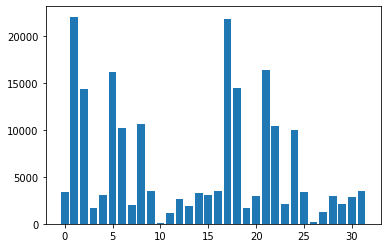

In [59]:
plt.bar(np.arange(len(X.columns)),clf4.feature_importances_)

In [60]:
for i,j in enumerate(X.columns):
    print(i,j)

0 first_1stIn
1 first_1stWon
2 first_2ndWon
3 first_SvGms
4 first_ace
5 first_bpFaced
6 first_bpSaved
7 first_df
8 first_svpt
9 first_age
10 first_hand
11 first_ht
12 first_id
13 first_ioc
14 first_rank
15 first_rank_points
16 second_1stIn
17 second_1stWon
18 second_2ndWon
19 second_SvGms
20 second_ace
21 second_bpFaced
22 second_bpSaved
23 second_df
24 second_svpt
25 second_age
26 second_hand
27 second_ht
28 second_id
29 second_ioc
30 second_rank
31 second_rank_points
